In [1]:


# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn



In [2]:
educacion = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

In [3]:
educacion.isnull().sum()

idpostulante    0
nombre          0
estado          0
dtype: int64

No tenemos nulos :)

# Pregunta interesante

Las personas que estan cursando la universidad a que tipo de empleo suelen postularse?

In [4]:
detalle = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

In [5]:
detalle['tipo_de_trabajo'].value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Por Horas             63
Pasantia              63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

In [6]:
educacion_universitario = educacion[educacion['nombre']=='Universitario']

In [7]:
educacion_universitario_en_curso = educacion_universitario[educacion_universitario['estado']=="En Curso"]

In [8]:
postulaciones = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_4_postulaciones.csv')

In [16]:
postulaciones.isnull().sum()

idaviso             0
idpostulante        0
fechapostulacion    0
dtype: int64

In [17]:
postulantes_cusando_universitario = pd.merge(educacion_universitario_en_curso, postulaciones, on='idpostulante', how='inner')

In [22]:
avisos_postulados_cursando_universitario = pd.merge(postulantes_cusando_universitario, detalle, on='idaviso', how='inner')

In [24]:
avisos_postulados_cursando_universitario.shape

(887642, 15)

Text(0,0.5,'Cantidad de postulantes')

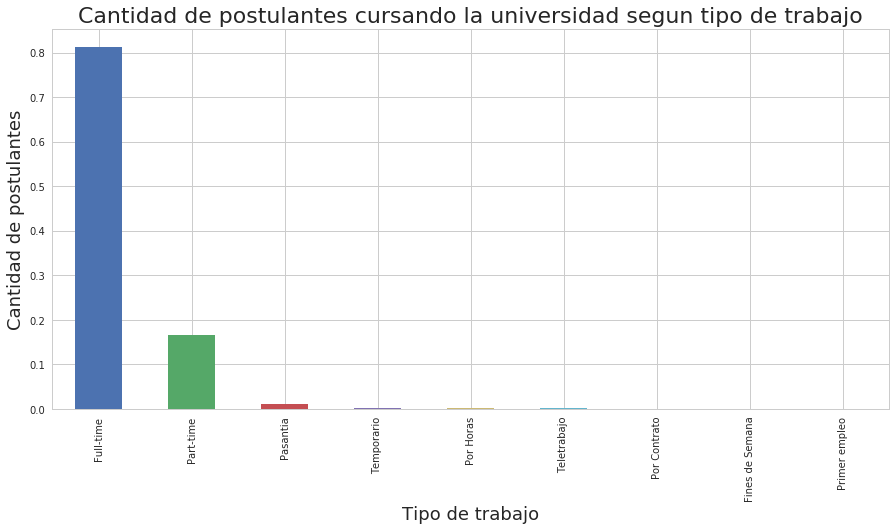

In [51]:
g = avisos_postulados_cursando_universitario['tipo_de_trabajo'].value_counts(100).plot.bar(figsize=(15,7))
g.set_title("Cantidad de postulantes cursando la universidad segun tipo de trabajo", fontsize=22)
g.set_xlabel("Tipo de trabajo",fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)

# Top 10 areas de postulacion gente con secundario completo

In [57]:
educacion_secundario = educacion[educacion['nombre']=='Secundario']

In [58]:
educacion_secundario_completo = educacion_secundario[educacion_secundario['estado']=="Graduado"]

In [59]:
postulantes_con_secundario_completo = pd.merge(educacion_secundario_completo, postulaciones, on='idpostulante', how='inner')

In [60]:
avisos_postulados_secundario_completo = pd.merge(postulantes_con_secundario_completo, detalle, on='idaviso', how='inner')

Text(0,0.5,'Cantidad de postulantes')

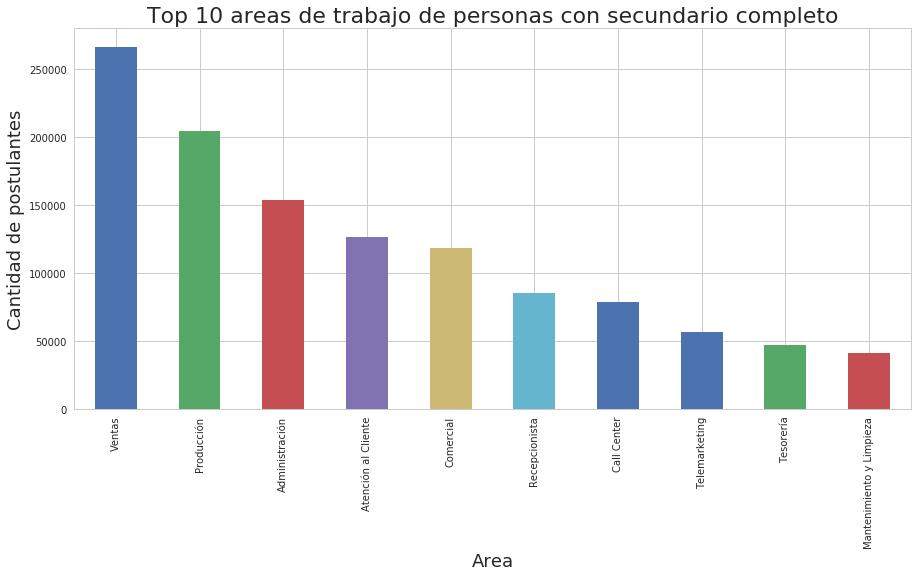

In [69]:
g =avisos_postulados_secundario_completo['nombre_area'].value_counts().head(10).plot.bar(figsize=(15,7))
g.set_title("Top 10 areas de trabajo de personas con secundario completo", fontsize=22)
g.set_xlabel("Area",fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)